# Porovnání spline, kubické a lineární interpolace

In [1]:
using DrWatson
@quickactivate "Eigenvalue bounds of p-Laplacian"

using Plots; gr()

include(srcdir("pLaplaceNumerics.jl"));
include(srcdir("pLaplaceInterpolation.jl"));
include(srcdir("pLaplaceEstimates.jl"));


## Horní odhad

$p=2$, počet bodů dělení intervalu $[0,1]$ je $n=31$

**Numerické řešení**

In [2]:

n = 31 # number of division points
ns = 1 # number of subdivision points of each subinterval

λ₁ᵉˣᵃᶜᵗ(P) = (P-1)*(2*(π/P)/(sin(π/P)))^P

p = 2
λ₁ = λ₁ᵉˣᵃᶜᵗ(p)
λᵢₙᵢₜ = (3.,1.5*λ₁)

t, tᴵ, U₁, U₁ᴵ, U₂, U₂ᴵ, Ud, Udᴵ, Λ₁ = plaplace_solve(λᵢₙᵢₜ, p, n); #, 
    
U₁[end] = 0
U₁ᴵ[end] = 0..0;    
    


**Proložení $U_1$ funkcí**
1. kubický spline
2. po částech polynom 3. stupně
3. po částech lineární fce

V tomto pořadí pak vykresleno intervalově v porovnání s numerickým řešením

In [3]:
csc_V₁, V₁ = cubic_natural_spline(t, U₁, U₁ᴵ, 0., 0., 
            ns=ns);

csc_V₁_ns, V₁_ns = polynomial_interpolation(t, U₁ᴵ, Udᴵ);

csc_V₁_lin, V₁_lin = linear_interpolation(t, U₁ᴵ);

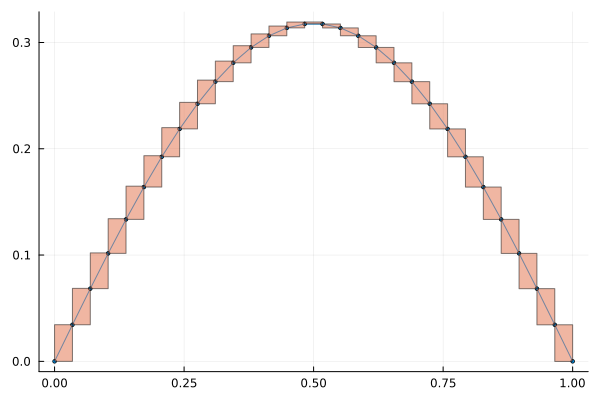

In [4]:
plt = plot(t, U₁, marker=2)
boxes = IntervalBox.(tᴵ, V₁)    
plot!(boxes, legend=false)
display(plt)

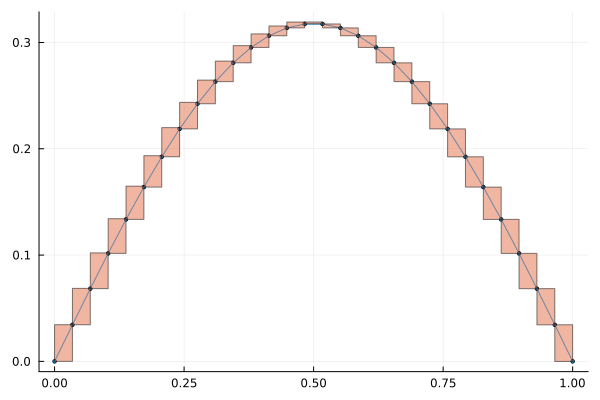

In [5]:
plt = plot(t, U₁, marker=2)
boxes = IntervalBox.(tᴵ, V₁_ns)    
plot!(boxes, legend=false)
display(plt)

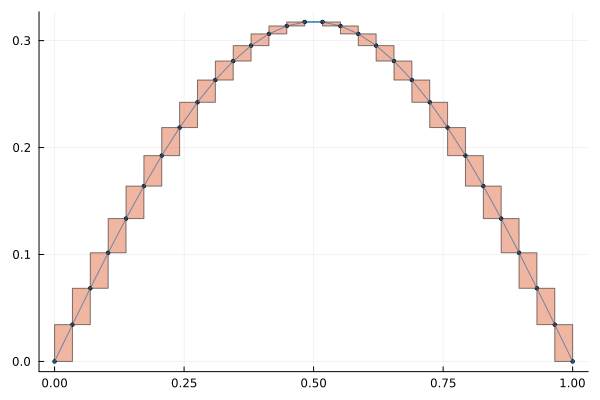

In [6]:
plt = plot(t, U₁, marker=2)
boxes = IntervalBox.(tᴵ, V₁_lin)    
plot!(boxes, legend=false)
display(plt)

**Derivace testovací fce $V_1$**

Postupně:
1. kubický spline
2. po částech polynom 3. stupně
3. po částech lineární fce

V tomto pořadí pak vykresleno intervalově

In [7]:
V₁_der = der_cubic_spline(csc_V₁, t); 
V₁_der_ns = der_cubic_spline(csc_V₁_ns, t); 
V₁_der_lin = der_cubic_spline(csc_V₁_lin, t); 

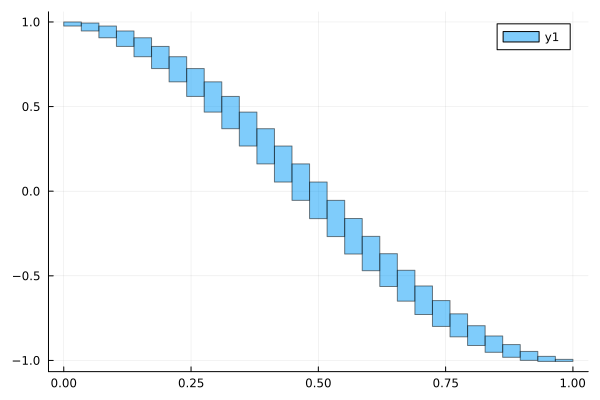

In [8]:
plot(IntervalBox.(tᴵ, V₁_der))

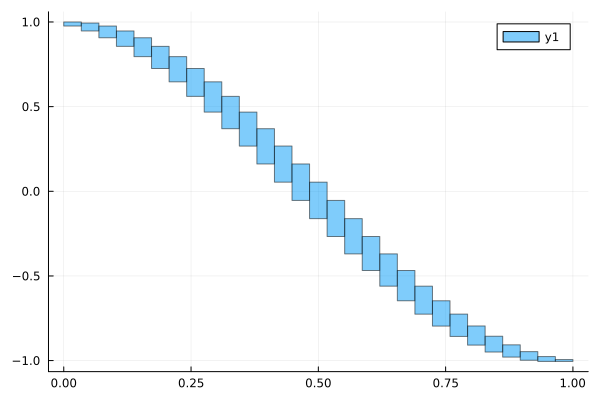

In [9]:
plot(IntervalBox.(tᴵ, V₁_der_ns))

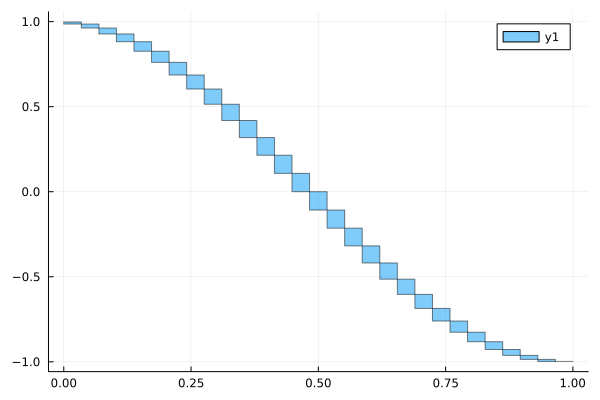

In [10]:
plot(IntervalBox.(tᴵ, V₁_der_lin))

**Výpočet horního odhadu**

Postupně pro
1. kubický spline
2. po částech polynom 3. stupně
3. po částech lineární fce


In [11]:
λ₁ᵘᵖ = upper_estimate(V₁, V₁_der, p);
λ₁ᵘᵖ_ns = upper_estimate(V₁_ns, V₁_der_ns, p);
λ₁ᵘᵖ_lin = upper_estimate(V₁_lin, V₁_der_lin, p);

println("Přesné řešení λ₁: $(λ₁ᵉˣᵃᶜᵗ(p))")
println("Odhad pomocí kubického splinu: $(λ₁ᵘᵖ)")
println("Odhad pomocí po částech polynomu 3. stupně: $(λ₁ᵘᵖ_ns)")
println("Odhad pomocí po částech lineární fce: $(λ₁ᵘᵖ_lin)")

Přesné řešení λ₁: 9.869604401089358
Odhad pomocí kubického splinu: 12.133635821183136
Odhad pomocí po částech polynomu 3. stupně: 12.105128236568744
Odhad pomocí po částech lineární fce: 11.317220167335574


## Dolní odhad

$p=2$, počet bodů dělení intervalu $[0,1]$ je $n=31$

**Numerické řešení**

In [12]:

n = 31 # number of division points
ns = 1 # number of subdivision points of each subinterval

λ₁ᵉˣᵃᶜᵗ(P) = (P-1)*(2*(π/P)/(sin(π/P)))^P

p = 2
λ₁ = λ₁ᵉˣᵃᶜᵗ(p)
λᵢₙᵢₜ = (3.,1.5*λ₁)
r = 10/(n*ns)
dom = (-r, r+1)

t, tᴵ, U₁, U₁ᴵ, U₂, U₂ᴵ, Ud, Udᴵ, Λ₁ = plaplace_solve(λᵢₙᵢₜ, p, n, dom=dom);


**Proložení $U_2$ funkcí**
1. kubický spline
2. po částech lineární fce

V tomto pořadí pak vykresleno intervalově v porovnání s numerickým řešením

In [13]:
ud1 = -Λ₁ * U₁[end]^(p-1)
csc_V₂, V₂ = cubic_end_slope_spline(t, U₂, U₂ᴵ, ud1, ud1, ns=ns);

csc_V₂_lin, V₂_lin = linear_interpolation(t, U₂ᴵ);

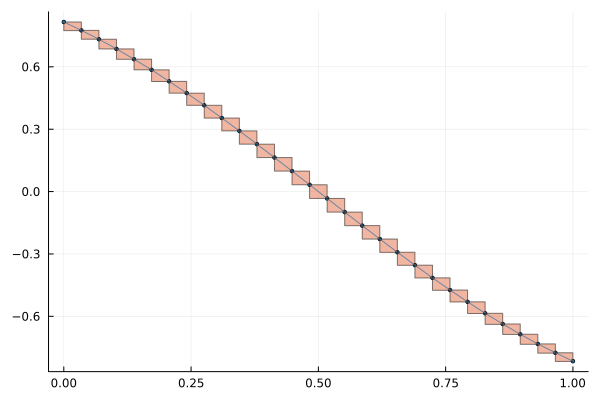

In [14]:
plt = plot(t, U₂, marker=2)
boxes = IntervalBox.(tᴵ, V₂)    
plot!(boxes, legend=false)
display(plt)

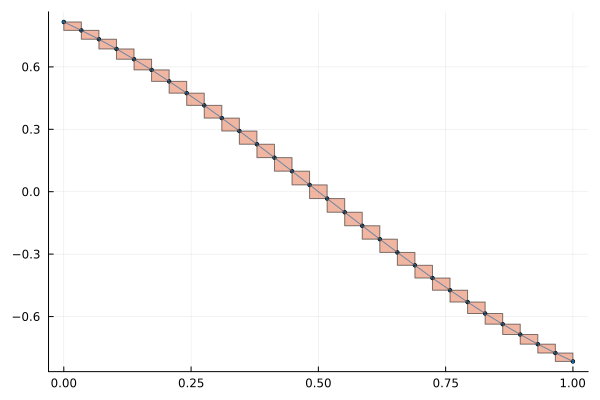

In [15]:
plt = plot(t, U₂, marker=2)
boxes = IntervalBox.(tᴵ, V₂_lin)    
plot!(boxes, legend=false)
display(plt)

**Z $V_2$ získáme $V_1$**

Postupně:
1. kubický spline
2. po částech lineární fce

V tomto pořadí pak vykresleno intervalově

In [16]:
V₁ = get_v1(p, V₂, t);
V₁_lin = get_v1(p, V₂_lin, t);

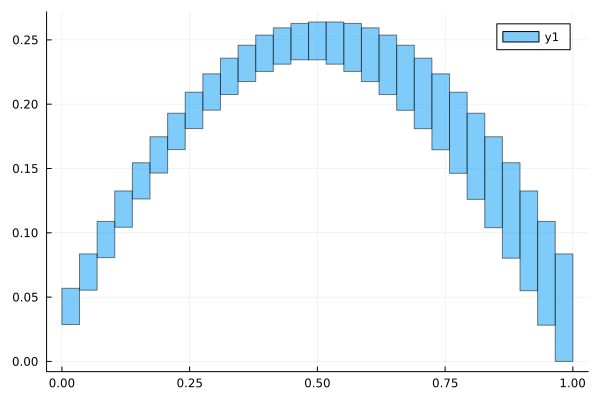

In [17]:
plot(IntervalBox.(tᴵ, V₁))

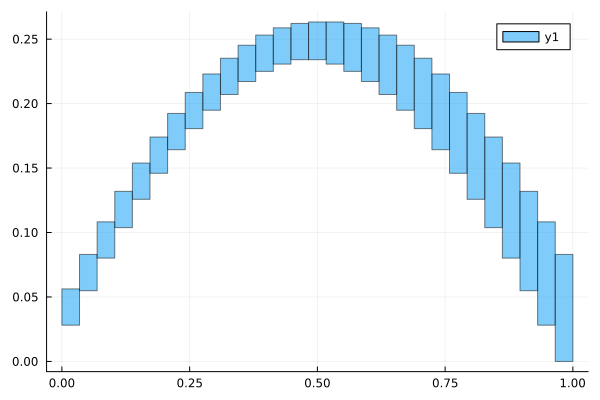

In [18]:
plot(IntervalBox.(tᴵ, V₁_lin))

**Derivace testovací fce $V_2$**

Postupně:
1. kubický spline
2. po částech lineární fce

V tomto pořadí pak vykresleno intervalově

In [19]:
V₂_der = der_cubic_spline(csc_V₂, t, ns=ns);
V₂_der_lin = der_cubic_spline(csc_V₂_lin, t);

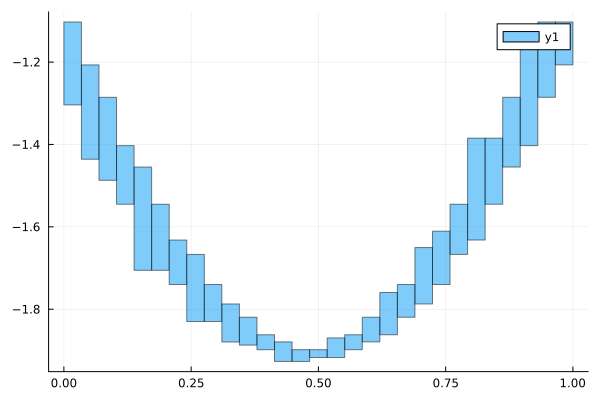

In [20]:
plot(IntervalBox.(tᴵ, V₂_der))

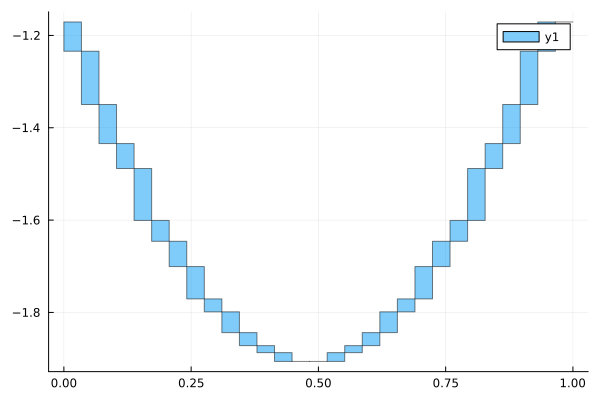

In [21]:
plot(IntervalBox.(tᴵ, V₂_der_lin))

**Výpočet dolního odhadu**

Postupně pro
1. kubický spline
2. po částech lineární fce

Vykreslená výsledná funkce ze které je $\lambda_1^{\text{low}} = \inf{(\min(F))}$

In [22]:
λ₁ˡᵒʷ, Fˡᵒʷ  = lower_estimate(V₂_der, V₁, p)
λ₁ˡᵒʷ_lin, Fˡᵒʷ_lin = lower_estimate(V₂_der_lin, V₁_lin, p);

Přesné řešení λ₁: 9.869604401089358
Dolní odhad pomocí kubického splinu: 6.9342816808142125


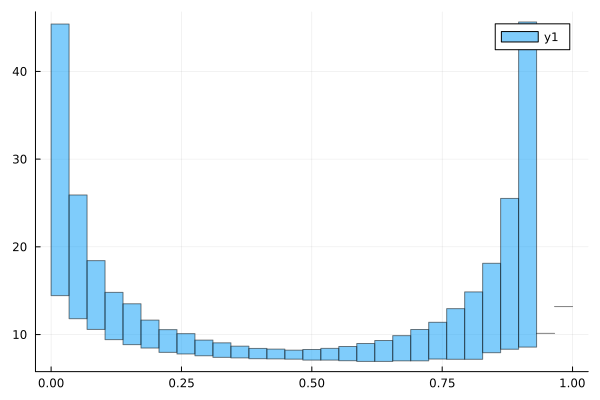

In [25]:
println("Přesné řešení λ₁: $(λ₁ᵉˣᵃᶜᵗ(p))")
println("Dolní odhad pomocí kubického splinu: $(λ₁ˡᵒʷ)")
plot(IntervalBox.(tᴵ, Fˡᵒʷ))

Přesné řešení λ₁: 9.869604401089358
Dolní odhad pomocí po částech lineární fce: 7.1059403876238525


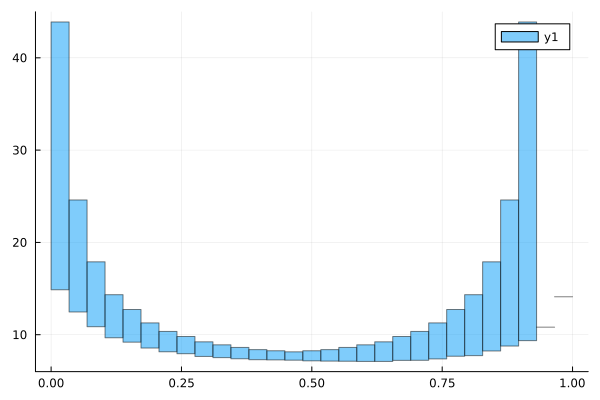

In [27]:
println("Přesné řešení λ₁: $(λ₁ᵉˣᵃᶜᵗ(p))")
println("Dolní odhad pomocí po částech lineární fce: $(λ₁ˡᵒʷ_lin)")
plot(IntervalBox.(tᴵ, Fˡᵒʷ_lin))